In [ ]:
#Блок 1 - импортирование всех библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
#Блок 2 - чтение данных и просмотр информации о датасетах

f = pd.read_csv("fundamentals.csv")
p = pd.read_csv("prices.csv")
psa = pd.read_csv("prices-split-adjusted.csv")
s = pd.read_csv("securities.csv")

In [ ]:
#Проверка на наличие пропущенных значений
print(p.isnull().any().any())

False


In [ ]:
f.info()
f.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
psa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [ ]:
#Блок 3 - подготовка данных к анализу(удаление пропусков, преобразование даты в формат datatime

f = f.dropna()
p = p.dropna()
psa = psa.dropna()
s = s.dropna()

In [ ]:
#Преобразуем столбец 'date' в формат datetime
p['date'] = pd.to_datetime(p['date'], format='mixed')

#Оставляем только дату
p["date"] = pd.to_datetime(p["date"], format="%Y-%m-%d")

#Проверяем результат
p['date'].head()

,date
0,2016-01-05
1,2016-01-06
2,2016-01-07
3,2016-01-08
4,2016-01-11


In [ ]:
df = p.merge(s, left_on="symbol", right_on="Ticker symbol")
df = df.merge(f, left_on="symbol", right_on="Ticker Symbol")

#Удаление ненужных столбцов
df.drop(columns=["Ticker symbol", "Ticker Symbol"], inplace=True)

df.head()
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume', 'Security',
       'SEC filings', 'GICS Sector', 'GICS Sub Industry',
       'Address of Headquarters', 'Date first added', 'CIK', 'Unnamed: 0',
       'Period Ending', 'Accounts Payable', 'Accounts Receivable',
       'Add'l income/expense items', 'After Tax ROE', 'Capital Expenditures',
       'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Common Stocks', 'Cost of Revenue',
       'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges',
       'Depreciation', 'Earnings Before Interest and Tax',
       'Earnings Before Tax', 'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'M

<ipython-input-12-531ec1a5c581>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


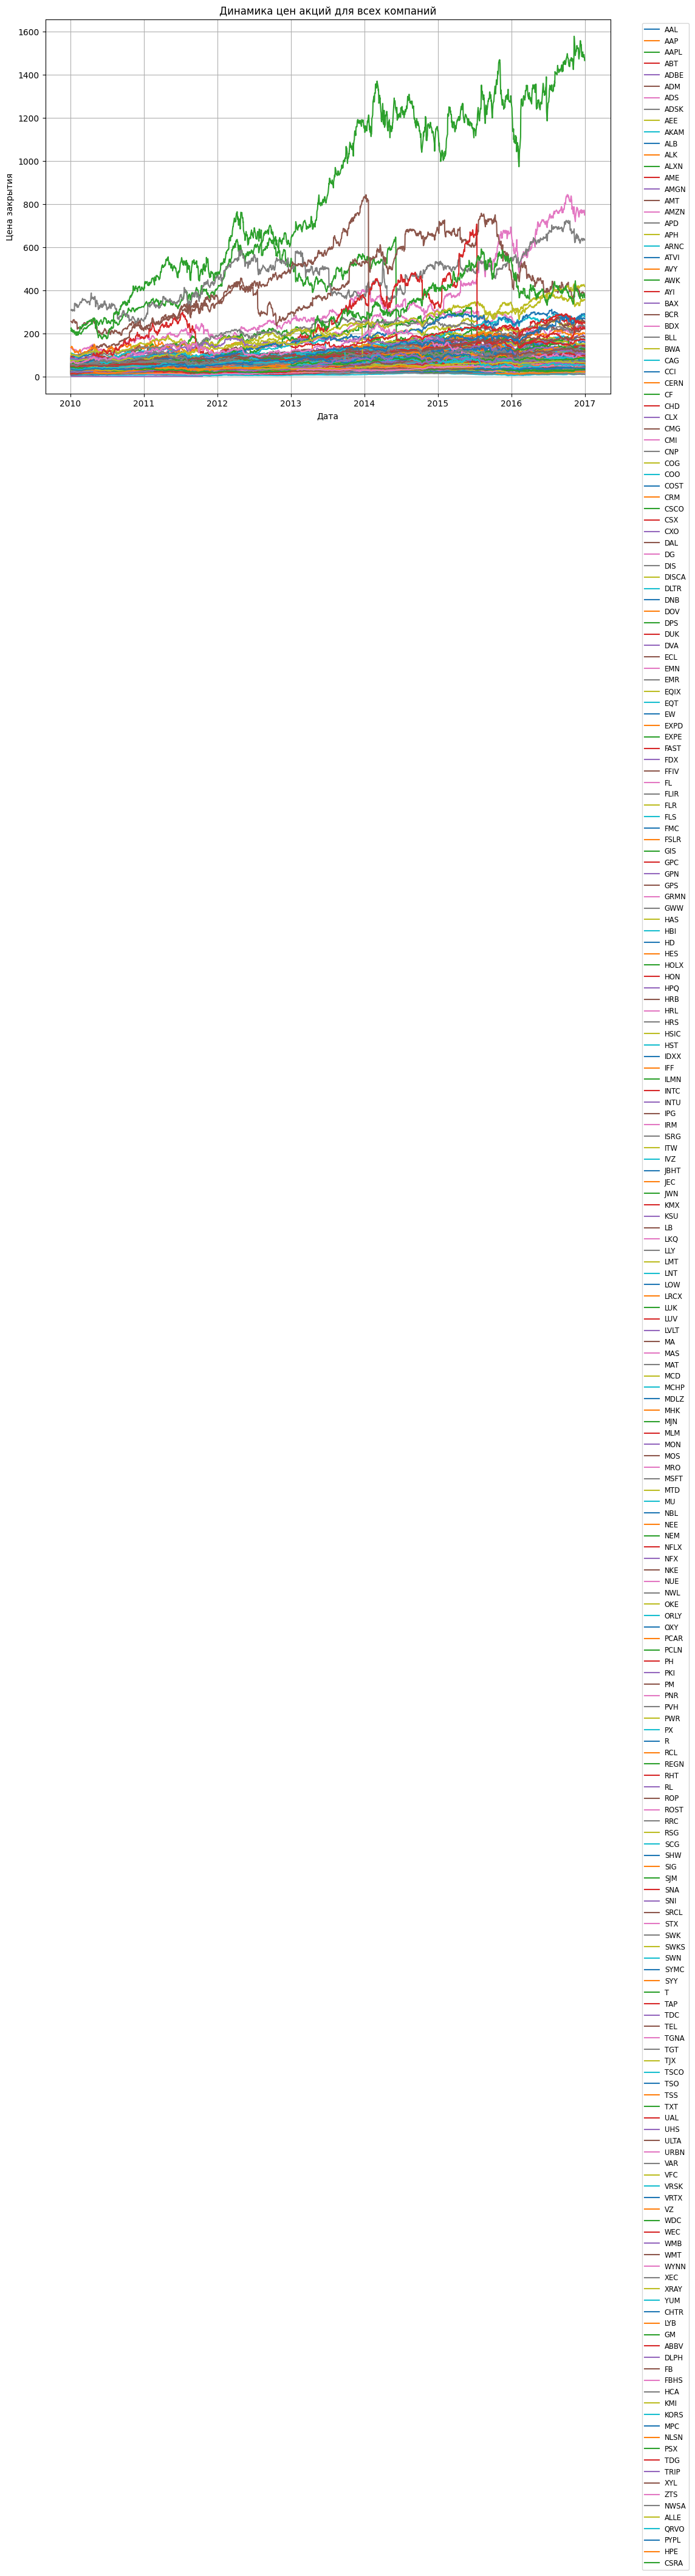

<ipython-input-12-531ec1a5c581>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_metrics, x='GICS Sector', y=metric, palette='viridis')


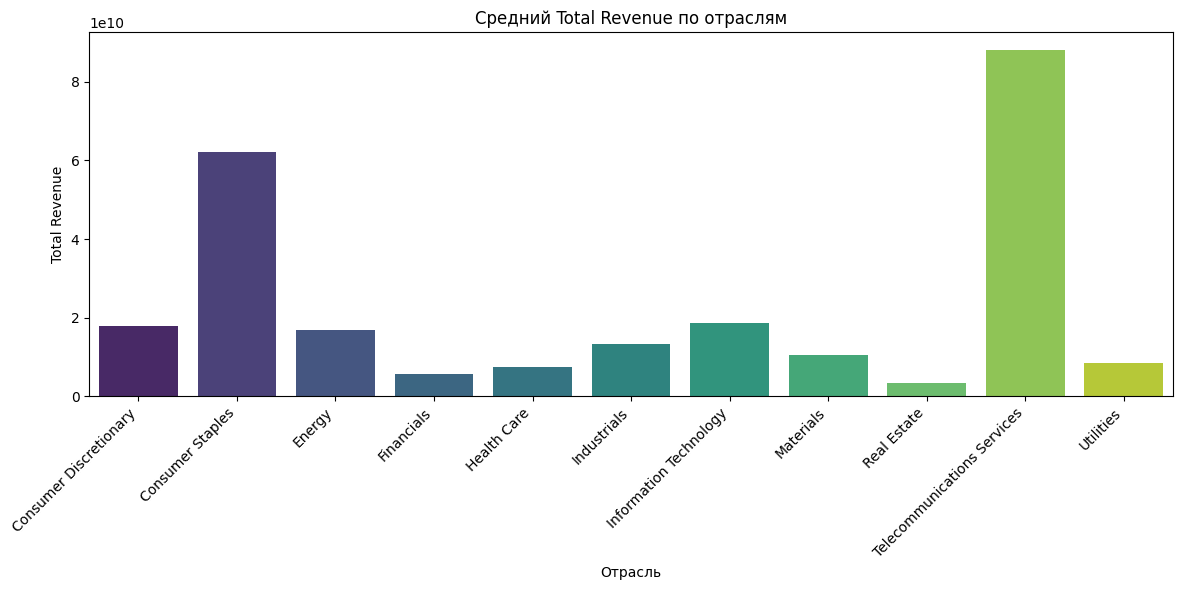

<ipython-input-12-531ec1a5c581>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_metrics, x='GICS Sector', y=metric, palette='viridis')


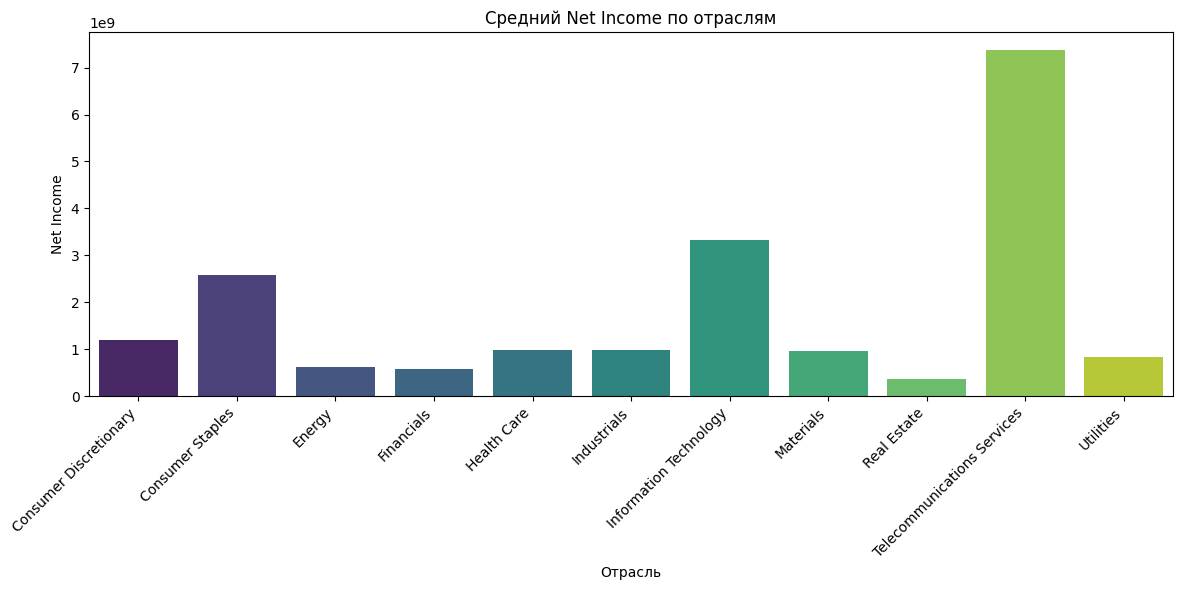

<ipython-input-12-531ec1a5c581>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_metrics, x='GICS Sector', y=metric, palette='viridis')


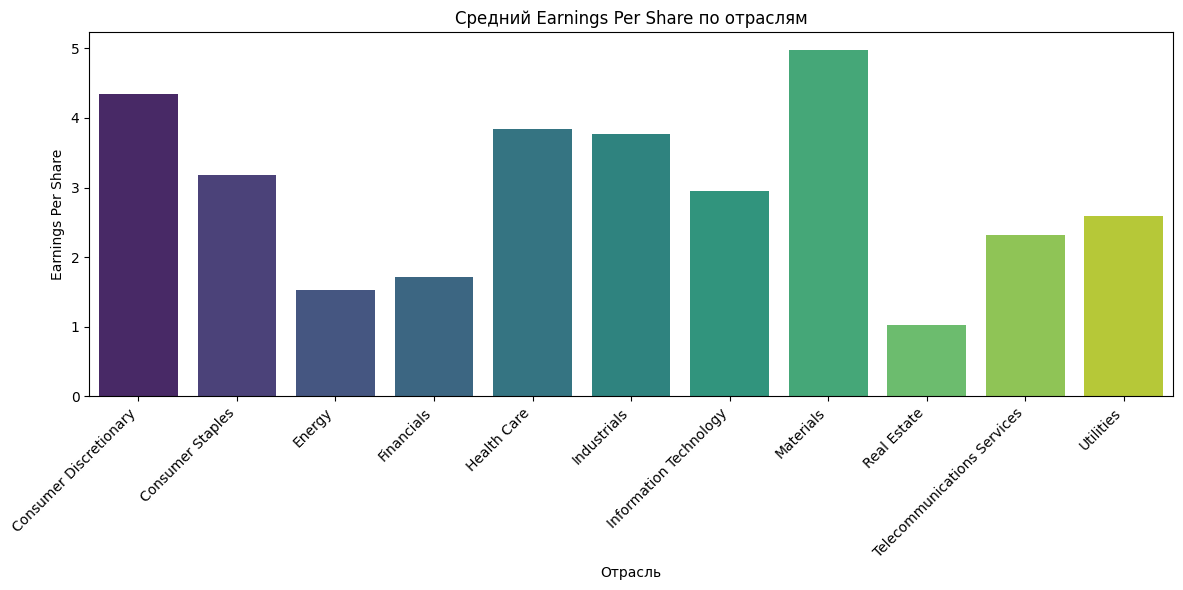

In [ ]:
#Анализ динамики цен акций
def analyze_stock_price_dynamics(df):
    plt.figure(figsize=(12, 8))

    #Группировка данных по компаниям
    for symbol in df['symbol'].unique():
        company_data = df[df['symbol'] == symbol]
        plt.plot(
            company_data['date'],
            company_data['close'],
            label=symbol
        )

    plt.title('Динамика цен акций для всех компаний')
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')
    plt.grid()
    plt.tight_layout()
    plt.show()

#Оценка влияния отраслевых факторов на производительность
def analyze_industry_impact(df):
    #Выбираем необходимые метрики и отраслевую информацию
    metrics = ['Total Revenue', 'Net Income', 'Earnings Per Share']
    industry_metrics = df.groupby('GICS Sector')[metrics].mean().reset_index()

    #Визуализация с использованием столбчатого графика
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=industry_metrics, x='GICS Sector', y=metric, palette='viridis')
        plt.title(f'Средний {metric} по отраслям')
        plt.xlabel('Отрасль')
        plt.ylabel(metric)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

#Анализ динамики цен акций
analyze_stock_price_dynamics(df)

#Оценка влияния отраслевых факторов
analyze_industry_impact(df)

In [ ]:
#Расчитываем 30-дневные и 60-дневные скользящие средние для каждой компании
p['MA_30'] = p.groupby('symbol')['close'].transform(lambda x: x.rolling(window=30).mean())
p['MA_60'] = p.groupby('symbol')['close'].transform(lambda x: x.rolling(window=60).mean())

#Добавление сигнала тренда (разница между 30 и 60-дневными средними)
p['trend_signal'] = p['MA_30'] - p['MA_60']

#Подготовка финального датасета
#Расчитываем среднее значение скользящих средних и тренда за каждый символ
p_aggregated = p.groupby('symbol').agg({
    'MA_30': 'mean',
    'MA_60': 'mean',
    'trend_signal': 'mean'
}).reset_index()

#Переименуем столбец для объединения с датасетом f
p_aggregated.rename(columns={'symbol': 'Ticker Symbol'}, inplace=True)

#Объединение f и p_aggregated
f = f.merge(p_aggregated, how='left', on='Ticker Symbol')

#Проверка обновленного датасета
f.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding,MA_30,MA_60,trend_signal
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08,23.828355,23.801258,0.331751
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08,23.828355,23.801258,0.331751
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08,23.828355,23.801258,0.331751
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08,23.828355,23.801258,0.331751
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07,103.730998,103.805213,1.027674


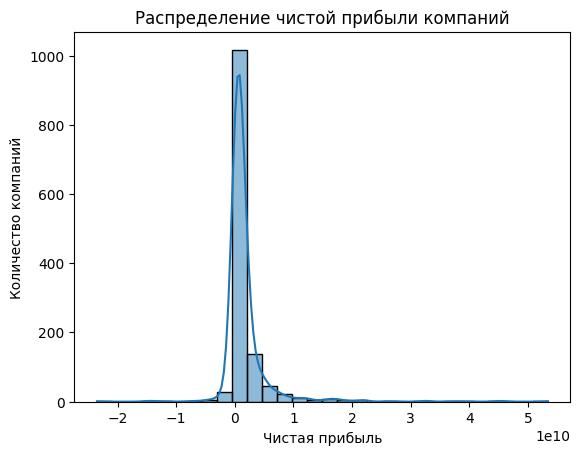

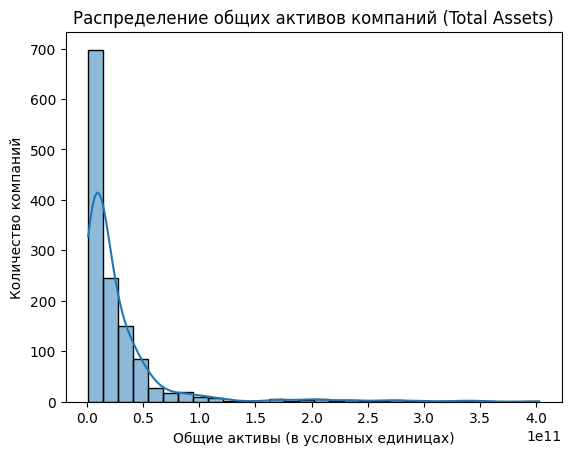

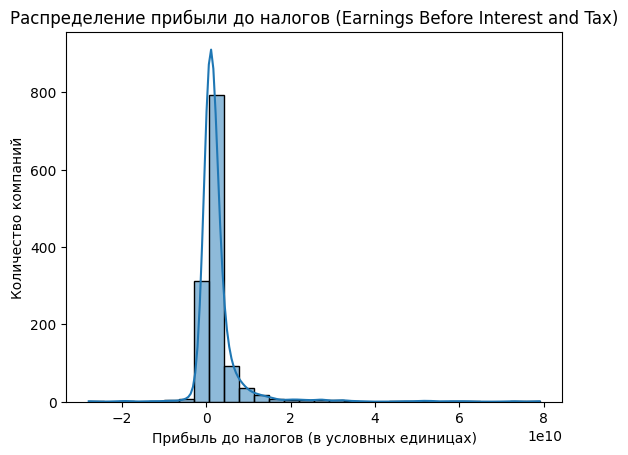

In [ ]:
#График распределения "Net Income" (чистая прибыль)
sns.histplot(f["Net Income"], bins=30, kde=True)
plt.title("Распределение чистой прибыли компаний")
plt.xlabel("Чистая прибыль")
plt.ylabel("Количество компаний")
plt.show()

#График распределения Total Assets (общих активов)
sns.histplot(f["Total Assets"], bins=30, kde=True)
plt.title("Распределение общих активов компаний (Total Assets)")
plt.xlabel("Общие активы (в условных единицах)")
plt.ylabel("Количество компаний")
plt.show()

#График распределения Earnings Before Interest and Tax (прибыль до уплаты налогов)
sns.histplot(f["Earnings Before Interest and Tax"], bins=30, kde=True)
plt.title("Распределение прибыли до налогов (Earnings Before Interest and Tax)")
plt.xlabel("Прибыль до налогов (в условных единицах)")
plt.ylabel("Количество компаний")
plt.show()

In [ ]:
#Создание категории риска
def risk_category(row):
    if row["Net Income"] < 0:
        return "High Risk"
    elif row["Net Income"] / row["Total Assets"] < 0.05:
        return "Medium Risk"
    else:
        return "Low Risk"

f["Risk Category"] = f.apply(risk_category, axis=1)

#Проверка распределения категорий
print(f["Risk Category"].value_counts())

Risk Category
Low Risk       821
Medium Risk    398
High Risk       80
Name: count, dtype: int64


In [ ]:
#Блок 4 - подготовка и обучение нейронной сети

#Выбор признаков
features = ["Total Assets", "Net Income", "Earnings Before Interest and Tax"]
data = df[features + ["GICS Sector"]]

#Кодирование отраслей
data = pd.get_dummies(data, columns=["GICS Sector"], drop_first=True)

#Целевая переменная: вероятность банкротства
data["target"] = (data["Net Income"] < 0).astype(int)

#Разделение на признаки и целевую переменную
X = data.drop(columns=['target'])
y = data['target']

#Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Входной слой для финансовых признаков
input_layer = Input(shape=(X_train.shape[1],), name='financial_input')

#Модель
dense = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005))(input_layer)
dense = Dropout(0.5)(dense)
dense = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005))(dense)
dense = Dropout(0.5)(dense)

#Выходной слой с сигмоидной активацией для бинарной классификации
output = Dense(1, activation='sigmoid')(dense)

#Создание модели
model = Model(inputs=input_layer, outputs=output)

#Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
print("Модель успешно скомпилирована.")

#Применение ранней остановки
early_stopping = EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

#Обучение модели
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=5000,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Модель успешно скомпилирована.
Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.8330 - auc: 0.5151 - loss: 0.8792 - val_accuracy: 0.9418 - val_auc: 0.8792 - val_loss: 0.4089
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9451 - auc: 0.8081 - loss: 0.3663 - val_accuracy: 0.9545 - val_auc: 0.9792 - val_loss: 0.2276
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9571 - auc: 0.9473 - loss: 0.2154 - val_accuracy: 0.9654 - val_auc: 0.9950 - val_loss: 0.1540
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9674 - auc: 0.9809 - loss: 0.1546 - val_accuracy: 0.9732 - val_auc: 0.9972 - val_loss: 0.1276
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9730 - auc: 0.9890 - loss: 0.1326 - val_accuracy: 0.9744 - val_auc: 0.9983 - val_loss: 0.1155
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9760 - auc: 0.9922 - loss: 0.1217 - val_accuracy: 0.9784 - val_auc: 0.9984 - val_loss: 0.1081
E

8551/8551 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9834 - auc: 0.9991 - loss: 0.0908
Точность модели на тестовой выборке: 0.9836
ROC-AUC на тестовой выборке: 0.9992


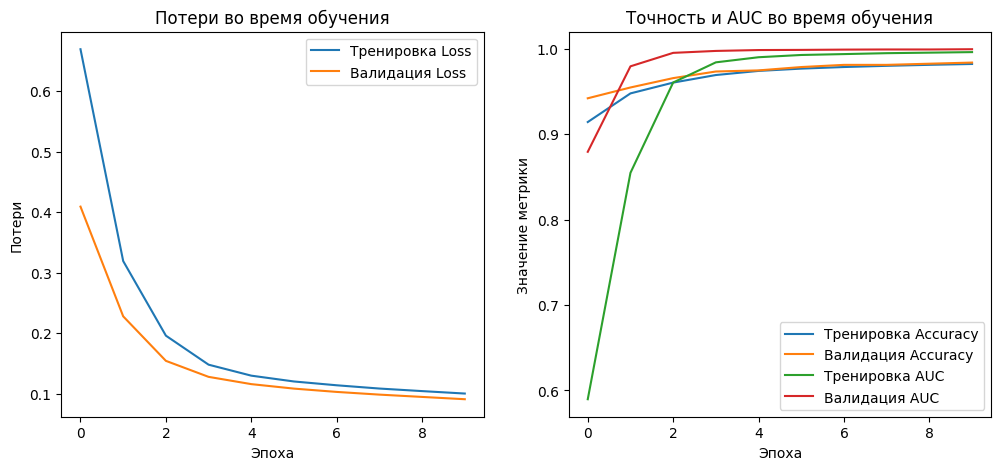

In [ ]:
#Оценка модели на тесте
loss, accuracy, auc = model.evaluate(X_test, y_test)
print(f'Точность модели на тестовой выборке: {accuracy:.4f}')
print(f'ROC-AUC на тестовой выборке: {auc:.4f}')

#Визуализация потерь и точности
plt.figure(figsize=(12,5))

#Потери
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Тренировка Loss')
plt.plot(history.history['val_loss'], label='Валидация Loss')
plt.title('Потери во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

#Точность и AUC
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Тренировка Accuracy')
plt.plot(history.history['val_accuracy'], label='Валидация Accuracy')
plt.plot(history.history['auc'], label='Тренировка AUC')
plt.plot(history.history['val_auc'], label='Валидация AUC')
plt.title('Точность и AUC во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Значение метрики')
plt.legend()

plt.show()

In [ ]:
#Блок 5 - предсказание банкротства компаний и рискованные для инвестиций

#Вывод количества всех компаний до предсказания
total_companies = data.shape[0]
print(f"Общее количество компаний до предсказания: {total_companies}")

#Прогноз вероятности банкротства для всех компаний
probabilities = model.predict(X_scaled)

#Добавляем вероятность банкротства к исходным данным
data['bankruptcy_probability'] = probabilities

#Устанавливаем порог для определения опасных компаний (например, вероятность банкротства > 0.5)
threshold = 0.5
data['high_risk'] = (data['bankruptcy_probability'] > threshold).astype(int)

#Сортируем компании по убыванию вероятности банкротства
high_risk_companies = data[data['high_risk'] == 1].sort_values(by='bankruptcy_probability', ascending=False)

#Проверяем, есть ли компании с высоким риском
if not high_risk_companies.empty:
    # Сохраняем данные в CSV файл
    high_risk_companies.to_csv('high_risk_companies.csv', index=False, float_format='%.6f')
    print(f"Обнаружено {len(high_risk_companies)} компаний с высоким риском банкротства.")
else:
    print("Компаний с высоким риском банкротства не обнаружено.")

#Отображение таблицы с высокорисковыми компаниями
high_risk_companies

Общее количество компаний до предсказания: 1368010
42751/42751 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step
Обнаружено 59153 компаний с высоким риском банкротства.


,Total Assets,Net Income,Earnings Before Interest and Tax,GICS Sector_Consumer Staples,GICS Sector_Energy,GICS Sector_Financials,GICS Sector_Health Care,GICS Sector_Industrials,GICS Sector_Information Technology,GICS Sector_Materials,GICS Sector_Real Estate,GICS Sector_Telecommunications Services,GICS Sector_Utilities,target,bankruptcy_probability,high_risk
901577,4.343700e+10,-7.829000e+09,-9.537000e+09,False,True,False,False,False,False,False,False,False,False,1,0.999911,1
341954,4.343700e+10,-7.829000e+09,-9.537000e+09,False,True,False,False,False,False,False,False,False,False,1,0.999911,1
1075251,4.343700e+10,-7.829000e+09,-9.537000e+09,False,True,False,False,False,False,False,False,False,False,1,0.999911,1
112396,4.343700e+10,-7.829000e+09,-9.537000e+09,False,True,False,False,False,False,False,False,False,False,1,0.999911,1
490408,4.343700e+10,-7.829000e+09,-9.537000e+09,False,True,False,False,False,False,False,False,False,False,1,0.999911,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114952,5.528956e+09,-2.704450e+08,-9.684600e+07,False,False,False,False,False,True,False,False,False,False,1,0.516174,1
29712,5.528956e+09,-2.704450e+08,-9.684600e+07,False,False,False,False,False,True,False,False,False,False,1,0.516174,1
554940,5.528956e+09,-2.704450e+08,-9.684600e+07,False,False,False,False,False,True,False,False,False,False,1,0.516174,1
136548,5.528956e+09,-2.704450e+08,-9.684600e+07,False,False,False,False,False,True,False,False,False,False,1,0.516174,1


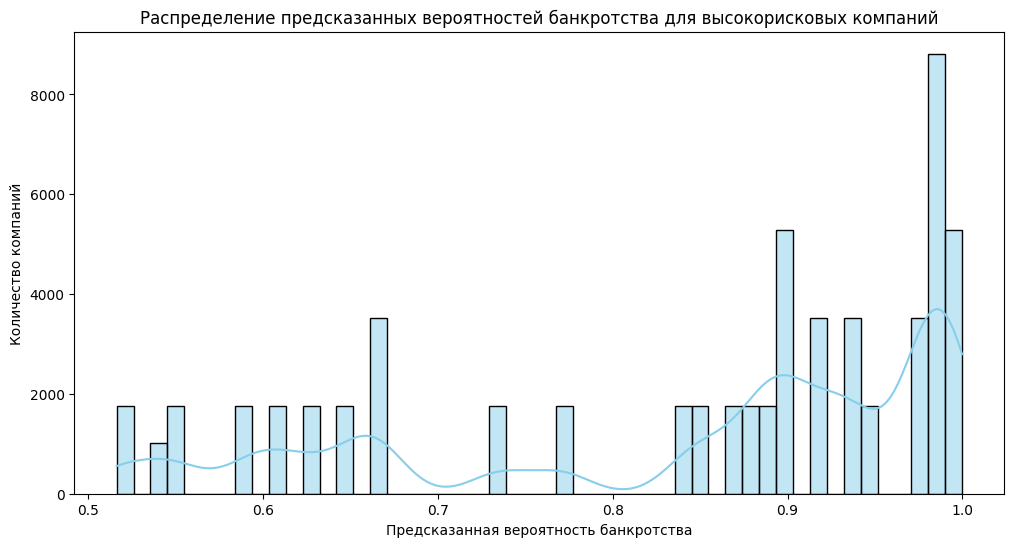

In [ ]:
#Визуализация распределения предсказанных вероятностей для высокорисковых компаний
plt.figure(figsize=(12, 6))
sns.histplot(high_risk_companies['bankruptcy_probability'], bins=50, kde=True, color='skyblue')
plt.title('Распределение предсказанных вероятностей банкротства для высокорисковых компаний')
plt.xlabel('Предсказанная вероятность банкротства')
plt.ylabel('Количество компаний')
plt.show()

In [ ]:
#Прогнозирование и анализ результатов
predicted_probabilities = model.predict(X_test)
predicted_classes = (predicted_probabilities > 0.5).astype(int)

#Вывод результатов
for i in range(100):
    print(f"Компания {i+1}: Вероятность банкротства = {predicted_probabilities[i][0]:.2f}, Классификация = {'Безопасна' if predicted_classes[i][0] == 0 else 'Рискованна'}")

8551/8551 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
Компания 1: Вероятность банкротства = 0.00, Классификация = Безопасна
Компания 2: Вероятность банкротства = 0.00, Классификация = Безопасна
Компания 3: Вероятность банкротства = 0.00, Классификация = Безопасна
Компания 4: Вероятность банкротства = 0.02, Классификация = Безопасна
Компания 5: Вероятность банкротства = 0.01, Классификация = Безопасна
Компания 6: Вероятность банкротства = 0.06, Классификация = Безопасна
Компания 7: Вероятность банкротства = 0.00, Классификация = Безопасна
Компания 8: Вероятность банкротства = 0.01, Классификация = Безопасна
Компания 9: Вероятность банкротства = 0.00, Классификация = Безопасна
Компания 10: Вероятность банкротства = 0.00, Классификация = Безопасна
Компания 11: Вероятность банкротства = 0.01, Классификация = Безопасна
Компания 12: Вероятность банкротства = 0.01, Классификация = Безопасна
Компания 13: Вероятность банкротства = 0.04, Классификация = Безопасна
Компания 14: Вероятность банкротства = 0.0